In [ ]:
# Practical 5: Implement Convolutional Neural Network for Digit Recognition on the MNIST Dataset.

Epoch 1/10
469/469 [==============================] - 36s 74ms/step - loss: 0.2302 - accuracy: 0.9335 - val_loss: 0.0706 - val_accuracy: 0.9783
Epoch 2/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0646 - accuracy: 0.9797 - val_loss: 0.0435 - val_accuracy: 0.9857
Epoch 3/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0374 - val_accuracy: 0.9878
Epoch 4/10
469/469 [==============================] - 63s 134ms/step - loss: 0.0364 - accuracy: 0.9893 - val_loss: 0.0379 - val_accuracy: 0.9886
Epoch 5/10
469/469 [==============================] - 61s 130ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0318 - val_accuracy: 0.9899
Epoch 6/10
469/469 [==============================] - 59s 125ms/step - loss: 0.0239 - accuracy: 0.9929 - val_loss: 0.0339 - val_accuracy: 0.9889
Epoch 7/10
469/469 [==============================] - 59s 126ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0296 - val_accu

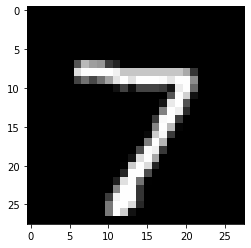

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define the CNN architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Show predictions for a sample input image
sample_img = x_test[0]
sample_label = y_test[0]
sample_img = np.expand_dims(sample_img, 0)
pred = model.predict(sample_img)
pred_label = np.argmax(pred)
print("Sample image true label:", sample_label)
print("Sample image predicted label:", pred_label)

# Display the sample image
plt.imshow(sample_img.squeeze(), cmap='gray')
plt.show()
